In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# train_data = pd.read_csv('D:\\UMS\\Semester 7\\FYP2\Extend_build\\train.csv')
# test_data = pd.read_csv('https://raw.githubusercontent.com/sahdan96/randomforest/main/test_2v.csv')
train_data = pd.read_csv('https://raw.githubusercontent.com/sahdan96/randomforest/main/train_2v.csv')

In [ ]:
import time
start =time.time()

In [ ]:
train_data['bmi'] = train_data['bmi'].fillna(train_data['bmi'].mean())

In [ ]:
train_data.dropna(axis=0, inplace=True)

In [ ]:
train_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

In [ ]:
train_data['gender']=label.fit_transform(train_data['gender'])
train_data['ever_married']=label.fit_transform(train_data['ever_married'])
train_data['work_type']=label.fit_transform(train_data['work_type'])
train_data['Residence_type']=label.fit_transform(train_data['Residence_type'])
train_data['smoking_status']=label.fit_transform(train_data['smoking_status'])

In [ ]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,52800,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,41413,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,15266,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [ ]:
train_data['stroke'].value_counts()

0    29470
1      638
Name: stroke, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
ros = RandomOverSampler(random_state=0)
smote= SMOTE(random_state =0, sampling_strategy='minority')
adasyn= ADASYN(random_state =0, sampling_strategy='minority')

In [ ]:
X_resampled, y_resampled = ros.fit_resample(train_data.loc[:,train_data.columns!='stroke'], 
                                            train_data['stroke'])
X_resampled2, y_resampled2 = smote.fit_resample(train_data.loc[:,train_data.columns!='stroke'], 
                                            train_data['stroke'])
X_resampled3, y_resampled3 = adasyn.fit_resample(train_data.loc[:,train_data.columns!='stroke'], 
                                            train_data['stroke'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_resampled2,y_resampled2,test_size=0.2)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X_resampled3,y_resampled3,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle

In [ ]:
def apply_model(xtrain, ytrain):
    ran = RandomForestClassifier(random_state= 0)
    ran.fit(xtrain, ytrain)

    filename = 'finalized_model.sav'
    pickle.dump(ran, open(filename, 'wb'))
    return ran



In [ ]:
pred=apply_model(X_train, y_train).predict(X_test)
pred2=apply_model(X_train2, y_train2).predict(X_test2)
pred3=apply_model(X_train3, y_train3).predict(X_test3)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, auc,roc_auc_score, precision_score, recall_score,f1_score

In [ ]:
def generate_model_report(y_test, pred):
    print("Accuracy = " , accuracy_score(y_test, pred))
    print("Precision = " ,precision_score(y_test, pred))
    print("Recall = " ,recall_score(y_test, pred))
    print("F1 Score = " ,f1_score(y_test, pred))
    pass

In [ ]:
print("ROS:")
generate_model_report(y_test,pred)
print("\nSMOTE:")
generate_model_report(y_test2,pred2)

print("\nADASYN:")
generate_model_report(y_test3,pred3)

print("\nADASYN:")
generate_model_report(y_test,pred4)

ROS:
Accuracy =  0.9997455039022735
Precision =  0.999482580200069
Recall =  1.0
F1 Score =  0.9997412231519021

SMOTE:
Accuracy =  0.987444859178826
Precision =  0.9998265996185192
Recall =  0.9751395230847285
F1 Score =  0.9873287671232875

ADASYN:
Accuracy =  0.9869546802202457
Precision =  0.9994778067885117
Recall =  0.9743763787544545
F1 Score =  0.9867674858223062

ADASYN:
Accuracy =  0.9992365117068205
Precision =  0.9984493452791179
Recall =  1.0
F1 Score =  0.999224071040607


In [ ]:
from matplotlib import pyplot

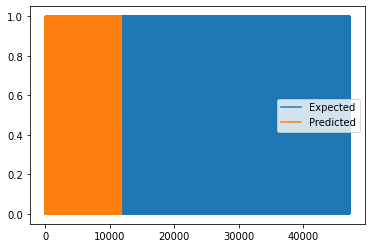

In [ ]:
pyplot.plot(y_train, label='Expected')
pyplot.plot(y_test, label='Predicted')
pyplot.legend()
pyplot.show()